In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

In [5]:
# Read in the image and print out some stats
image = mpimg.imread('test.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
# Note: always make a copy rather than simply using "="
color_select = np.copy(image)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [6]:
# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

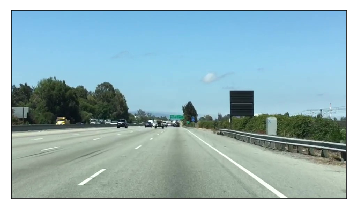

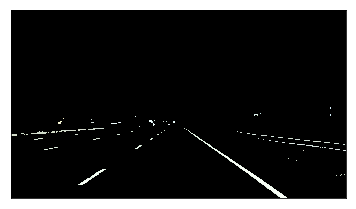

In [7]:
# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(color_select)
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
# Interactive threshold setting

from ipywidgets import interact
from PIL import Image, ImageChops

img = Image.open("test.jpg")

@interact
def binarize(th_r: (0, 255, 1), th_g: (0, 255, 1), th_b: (0, 255, 1)):
    r, g, b = img.split()
    _r = r.point(lambda p: 1 if p > th_r else 0, mode="1")
    _g = g.point(lambda p: 1 if p > th_g else 0, mode="1")
    _b = b.point(lambda p: 1 if p > th_b else 0, mode="1")
    
    bimg = ImageChops.logical_and(_r, _g)
    bimg = ImageChops.logical_and(bimg, _b)
    
    canvas = Image.new('RGB', (2*img.width, img.height), (255, 255, 255))
    canvas.paste(img, (0, 0))
    canvas.paste(bimg, (img.width, 0))
    return canvas

A Jupyter Widget